# Multiclass Classification Neural Network

In [1]:
# Importing TF and checking the version
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
from tensorflow.keras.datasets import fashion_mnist

# The data is already split into training and testing subsets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
# Show first training sample
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

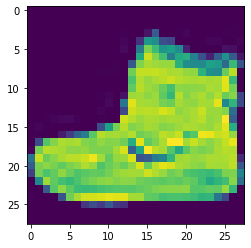

In [4]:
# Plot first training sample
import matplotlib.pyplot as plt

plt.imshow(train_data[0])

In [5]:
# List of actual classes

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"
]
len(class_names)

10

Text(0.5, 1.0, 'Sneaker')

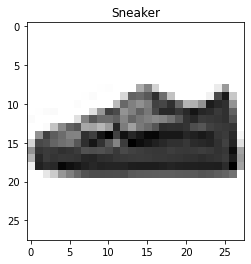

In [6]:
# Plot an example image and its label
index_of_choice = 108
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

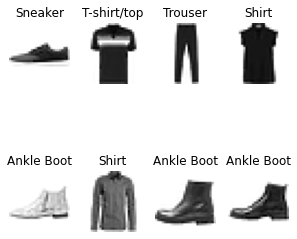

In [7]:
# Random 4 images from the training dataset
import random

plt.figure(figsize=(5, 5))

for i in range(8):
    ax = plt.subplot(2, 4, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Model 1

In [8]:
# Create a model
model_mc1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model - Sparse Categorical Crossentropy
model_mc1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_mc1 = model_mc1.fit(
    train_data,
    train_labels,
    epochs=10,
    validation_data=(test_data, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3804 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3029 - accuracy: 0.1006 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0967 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3026 - val_accurac

In [9]:
tf.one_hot(train_labels, depth=10)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [10]:
# Create a model
model_mc1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_mc1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_mc1 = model_mc1.fit(
    train_data,
    tf.one_hot(train_labels, depth=10),
    epochs=10,
    validation_data=(test_data, tf.one_hot(test_labels, depth=10))
)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3168 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3028 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3028 - accuracy: 0.0969 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3027 - accuracy: 0.1004 - val_loss: 2.3027 - val_ac

In [11]:
# Model summary
model_mc1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Checking min/max values
train_data.min(), train_data.max()

(0, 255)

In [13]:
# Normalise the data in the interval 0 to 1
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [14]:
# Checking normalised min/max values
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [15]:
# Create a model
model_mc2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_mc2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_mc2 = model_mc2.fit(
    train_data_norm,
    train_labels,
    epochs=10,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.9977 - accuracy: 0.6613 - val_loss: 0.6929 - val_accuracy: 0.7732
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.6145 - accuracy: 0.7958 - val_loss: 0.6282 - val_accuracy: 0.7902
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5629 - accuracy: 0.8105 - val_loss: 0.5892 - val_accuracy: 0.8058
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5409 - accuracy: 0.8170 - val_loss: 0.5690 - val_accuracy: 0.8105
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.5281 - accuracy: 0.8199 - val_loss: 0.5628 - val_accuracy: 0.8083
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5184 - accuracy: 0.8230 - val_loss: 0.5619 - val_accuracy: 0.8143
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.5124 - accuracy: 0.8236 - val_loss: 0.5573 - val_ac

<AxesSubplot:title={'center':'Normalised data'}>

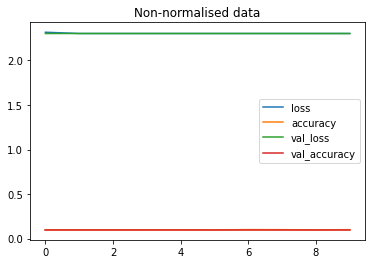

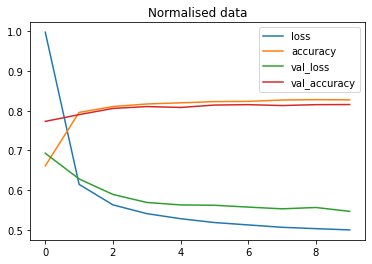

In [16]:
import pandas as pd

# Plot curves
pd.DataFrame(history_mc1.history).plot(title="Non-normalised data")
pd.DataFrame(history_mc2.history).plot(title="Normalised data")

## Finding ideal learning rate

In [17]:
# Create a model
model_mc3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile a model
model_mc3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Create a learning rate call back
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
history_mc3 = model_mc3.fit(
    train_data_norm,
    train_labels,
    epochs=40,
    validation_data=(test_data_norm, test_labels),
    callbacks=[lr_scheduler]
)

Epoch 1/40
1875/1875 [==============================] - 12s 6ms/step - loss: 1.2176 - accuracy: 0.5059 - val_loss: 0.8023 - val_accuracy: 0.7109 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7107 - accuracy: 0.7454 - val_loss: 0.6944 - val_accuracy: 0.7474 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6593 - accuracy: 0.7628 - val_loss: 0.6643 - val_accuracy: 0.7627 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6354 - accuracy: 0.7720 - val_loss: 0.6522 - val_accuracy: 0.7727 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6184 - accuracy: 0.7809 - val_loss: 0.6298 - val_accuracy: 0.7860 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6090 - accuracy: 0.7861 - val_loss: 0.6306 - val_accuracy: 0.7843 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================

Text(0.5, 1.0, 'Finding the best learning rate')

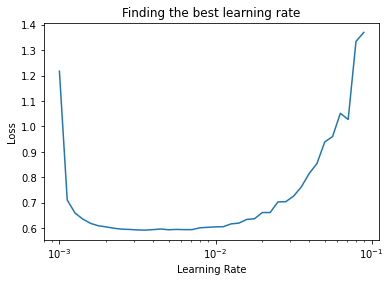

In [18]:
# Plot the learning rate curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, history_mc3.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the best learning rate")

Ideal learning rate seems to be at around 1e-3, i.e. 0.001

In [19]:
# Creating a model with ideal learning rate
model_mc4 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_mc4.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

# Fit the model
history_mc4 = model_mc4.fit(
    train_data_norm,
    train_labels,
    epochs=20,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/20
1875/1875 [==============================] - 13s 6ms/step - loss: 1.1349 - accuracy: 0.5782 - val_loss: 0.8318 - val_accuracy: 0.7032
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7394 - accuracy: 0.7323 - val_loss: 0.7185 - val_accuracy: 0.7373
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6756 - accuracy: 0.7531 - val_loss: 0.6946 - val_accuracy: 0.7476
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6444 - accuracy: 0.7631 - val_loss: 0.6662 - val_accuracy: 0.7597
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6272 - accuracy: 0.7701 - val_loss: 0.6601 - val_accuracy: 0.7593
Epoch 6/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.6152 - accuracy: 0.7726 - val_loss: 0.6475 - val_accuracy: 0.7633
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6085 - accuracy: 0.7753 - val_loss: 0.6456 - val_ac

## Confusion Matrix

In [20]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None,
                        figsize=(10, 10), text_size=15):
    # Create a confusion matrix function
    cm = confusion_matrix(y_true, y_pred)
    cm_normalised = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    print("Normalised confusion matrix:\n", cm_normalised)
    n_classes = cm.shape[0]
    print("Confusion matrix' shape:", cm.shape[0])

    # Let's beautify
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to classes
    if classes:
        labels = classes
    else:
        labels = np.arange(n_classes)

    # Label the axes
    ax.set(
        title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels
    )

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colours
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j, i, f"{cm[i, j]} ({cm_normalised[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color = "white" if cm[i, j] > threshold else "black",
            size=text_size
        )

In [22]:
# Make predictions
y_probs = model_mc4.predict(test_data_norm) # Prediction probabilities
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.81903620e-10, 1.04205064e-07, 2.15983387e-09, 3.69296913e-06,
        2.36490898e-08, 3.43302369e-01, 1.17091017e-10, 1.27928376e-01,
        2.28880999e-05, 5.28742552e-01],
       [6.13343623e-03, 1.24683864e-02, 7.45267272e-01, 7.65336072e-03,
        1.65314555e-01, 1.26866682e-03, 6.16284683e-02, 1.68307713e-04,
        9.74697177e-05, 5.14172065e-08],
       [5.84930676e-05, 9.98559773e-01, 6.90032961e-04, 6.88009080e-04,
        4.41731402e-07, 3.28964425e-11, 3.21609105e-06, 3.76644896e-11,
        6.65738284e-14, 1.35541039e-23],
       [3.45287390e-06, 9.99140024e-01, 3.45345215e-05, 8.21818016e-04,
        3.64996424e-08, 3.13773829e-09, 5.63319809e-08, 2.40113120e-08,
        1.65528602e-13, 4.05212582e-20],
       [2.97635108e-01, 6.42584928e-04, 2.66194865e-02, 7.75670558e-02,
        5.00647835e-02, 1.23057307e-08, 5.47302365e-01, 8.12143925e-16,
        1.68742787e-04, 1.20417981e-20]], dtype=float32)

In [25]:
# Convert preds into integers
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 4, 5, 7], dtype=int64)

In [26]:
# Calculation the confusion matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[803,   3,   6,  72,  17,   0,  89,   0,  10,   0],
       [  4, 930,  15,  44,   2,   0,   2,   0,   3,   0],
       [ 16,   3, 699,  11, 223,   2,  37,   1,   8,   0],
       [ 51,   6,   7, 839,  25,   3,  59,   0,  10,   0],
       [  1,   0, 150,  36, 756,   3,  37,   0,  17,   0],
       [  0,   0,   0,   7,   2, 860,   0,  56,  13,  62],
       [202,   0,  93,  42, 465,   5, 177,   0,  16,   0],
       [  0,   0,   0,   0,   0,  39,   0, 910,   1,  50],
       [  0,   0,   1,  16,  42,  27,  17,   3, 893,   1],
       [  0,   0,   0,   0,   1,  35,   0,  43,   0, 921]], dtype=int64)

Normalised confusion matrix:
 [[0.803 0.003 0.006 0.072 0.017 0.    0.089 0.    0.01  0.   ]
 [0.004 0.93  0.015 0.044 0.002 0.    0.002 0.    0.003 0.   ]
 [0.016 0.003 0.699 0.011 0.223 0.002 0.037 0.001 0.008 0.   ]
 [0.051 0.006 0.007 0.839 0.025 0.003 0.059 0.    0.01  0.   ]
 [0.001 0.    0.15  0.036 0.756 0.003 0.037 0.    0.017 0.   ]
 [0.    0.    0.    0.007 0.002 0.86  0.    0.056 0.013 0.062]
 [0.202 0.    0.093 0.042 0.465 0.005 0.177 0.    0.016 0.   ]
 [0.    0.    0.    0.    0.    0.039 0.    0.91  0.001 0.05 ]
 [0.    0.    0.001 0.016 0.042 0.027 0.017 0.003 0.893 0.001]
 [0.    0.    0.    0.    0.001 0.035 0.    0.043 0.    0.921]]
Confusion matrix' shape: 10


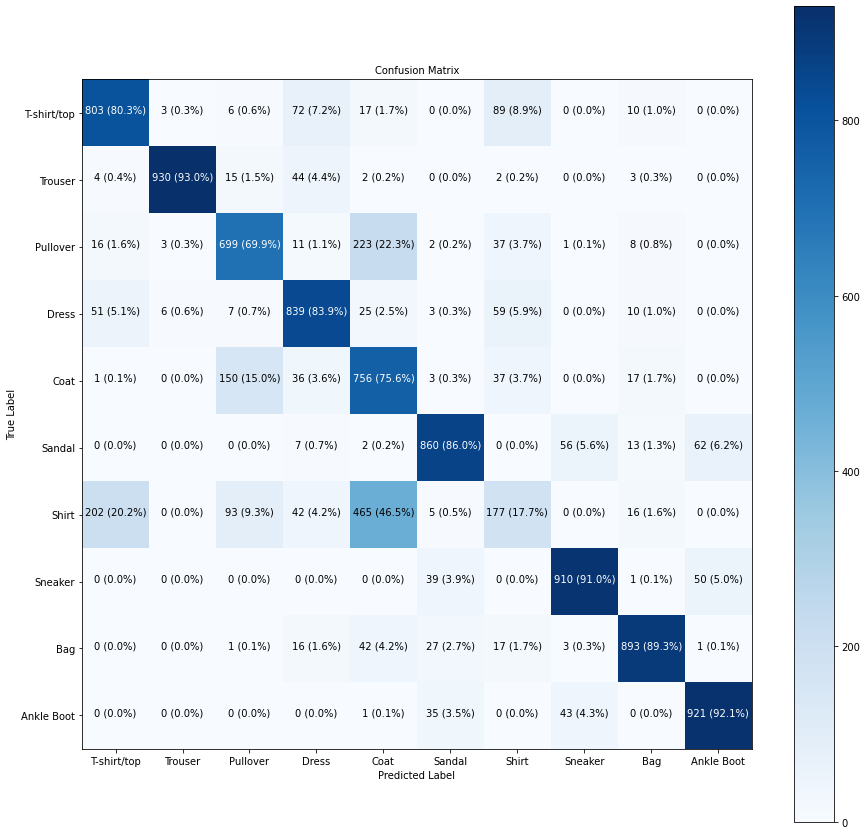

In [27]:
# Beautify with our function
make_confusion_matrix(y_true=test_labels, y_pred=y_preds, classes=class_names, figsize=(15, 15), text_size=10)